# Gravidade normal

Este notebook calcula a gravidade normal $\gamma$ utilizando dois métodos diferentes. O primeiro é a fórmula de Somiglinana (Hofmann-Wellenhof e Moritz, 2005, p. 72), que permite o cálculo de $\gamma$ sobre a superfície do elipsoide. O segundo é a fórmula analítica apresentada por Li e Gotze (2001), que permite calcular $\gamma$ não só na superfície do elipsoide, mas também abaixo ou acima desta.

References

* Li, X. and H. J. Götze, 2001, Tutorial: Ellipsoid, geoid, gravity, geodesy, and geophysics, 
    Geophysics, 66(6), p. 1660-1668, doi: 10.1190/1.1487109

* Hofmann-Wellenhof, B. and H. Moritz, 2005, Physical Geodesy, Springer-Verlag Wien,
    ISBN-13: 978-3-211-23584-3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import gamma

A figura abaixo ilustra um ponto $P$ com coordenadas geodésicas $h$ e $\varphi$, referidas a um elipsoide com semieixo maior $a$, semieixo menor $b$ e velocidade de rotação $\omega$.

<img src='coordenadas_geodesicas.png' width="600">

## Cálculo da gravidade normal $\gamma_{s}$ utilizando a fórmula de Somigliana

A fórmula de Somigliana é dada por:

### $\gamma_{s} = \dfrac{a \, \gamma_{a} \, cos^{2}\varphi + b \, \gamma_{b} \, sen^{2}\varphi}{\sqrt{a^{2} \, cos^{2}\varphi + b^{2} \, sen^{2}\varphi}}$

em que:

### $\gamma_{a} = \dfrac{G \, M}{a \, b} \,      \left( 1 - m - \dfrac{m}{6} \, \dfrac{e' \, q_{0}'}{q_{0}} \right)$

### $\gamma_{b} = \dfrac{G \, M}{a^{2}} \,      \left( 1 + \dfrac{m}{3} \, \dfrac{e' \, q_{0}'}{q_{0}} \right)$

### $e'= \dfrac{E}{b}$

### $E = \sqrt{a^{2} - b^{2}}$

### $m = \dfrac{\omega^{2} \, a^{2} \, b}{G \, M}$

### $q_{0} = \dfrac{1}{2}  \left[ \, \left( 1 + 3\dfrac{b^{2}}{E^{2}} \right) \, tan^{-1} \left( \dfrac{E}{b} \right) - 3\dfrac{b}{E} \right]$

### $q_{0}' = 3\left( 1 + \dfrac{b^{2}}{E^{2}} \right) \,  \left[ 1 - \dfrac{b}{E} \,tan^{-1} \left( \dfrac{E}{b} \right) \right] - 1$

sendo $a$, $b$, $\varphi$ e $\omega$ definidos de acordo com a figura mostrada acima. A fórmula de Somigliana fornece a gravidade normal sobre a superfície do elipsoide, portanto, $h = 0$. Observe que esta expressão não depende da longitude $\lambda$.

## Gravidade normal sobre o WGS84 de acordo com a fórmula de Somigliana

In [3]:
phi = np.linspace(0.0, 90.0, 91)
a, f, GM, omega = gamma.WGS84()
gammas = gamma.somigliana(a, f, GM, omega, phi)

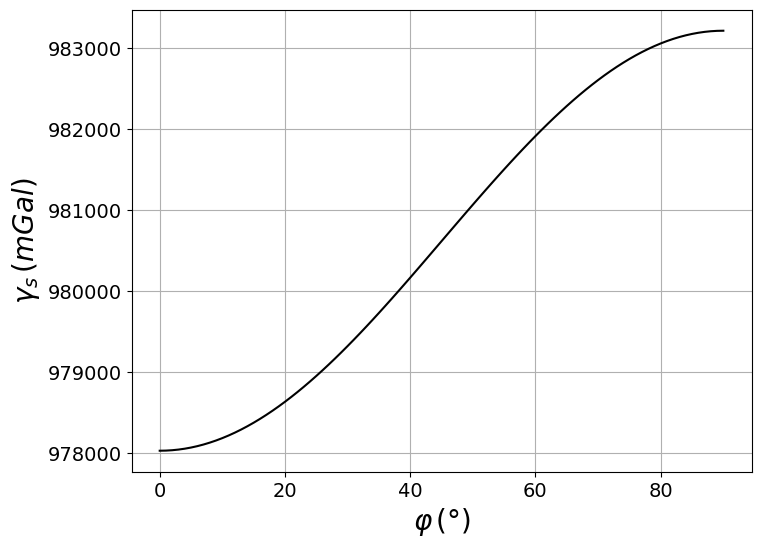

In [4]:
plt.close('all')
plt.figure(figsize=(8,6))
plt.xlabel('$\\varphi \, (\degree)$', fontsize = 20)
plt.ylabel('$\gamma_{s} \, (mGal)$', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(phi,gammas,'k-')
plt.grid()
plt.show()

Observe que a gravidade normal predita pela fórmula de Somigliana ($\gamma_{s}$) sobre o elipsoide é mínima na latitude $\varphi = 0^{\circ}$ (equador) e máxima na latitude $\varphi = 90^{\circ}$ (pólo). Isso se deve ao efeito da aceleração centrífuga. A gravidade normal é a soma entre a aceleração gravitacional e a aceleração centrífuga produzida pela Terra Normal. A parcela gravitacional aponta, aproximadamente, para o centro do elipsoide. Já a parcela centrífuga é perperdicular ao eixo de rotação ($z$) e aponta para fora do elipsoide. O valor da aceleração centrífuga é $0 \, (mGal)$ na latitude $\varphi = 90^{\circ}$ (pólo) e atinge o valor máximo na latitude $\varphi = 0^{\circ}$ (equador). Ou seja, no pólo, a gravidade normal possui apenas a componente gravitacional. À medida em que a latitude $\varphi$ diminui até o equador, o valor da componente centrífuga aumenta e, devido ao fato de esta apontar para fora do elipsoide, a aceleração centrífuga contribui para a diminuição da amplitude da gravidade normal. No equador, as parcelas gravitacional e centrífuga da gravidade normal têm a mesma direção, mas sentidos contrários. Isso explica o motivo pelo qual a gravidade normal tem a menor amplitude na latitude $\varphi = 0^{\circ}$ (equador).

## Cálculo da gravidade normal $\gamma_{cf}$ utilizando a expressão analítica

A expressão analítica é dada por:

### $\gamma_{cf} = \dfrac{1}{W} \left[ \dfrac{GM}{b'^{2} + E^{2}} + \dfrac{\omega^{2} a^{2} E q'_{0}}{(b'^{2} + E^{2})q_{0}} \left( \dfrac{1}{2} sen^{2}\beta' - \dfrac{1}{6}\right) - \omega^{2} b' cos^{2}\beta'\right]$

em que

### $E = \sqrt{a^{2} - b^{2}}$

### $W = \sqrt{\dfrac{b'^{2}+E^{2}sen^{2}\beta'}{b'^{2}+E^{2}}}$

### $q_{0} = 3 \left( 1 + \dfrac{b'^{2}}{E^{2}} \right) \left( 1 - \dfrac{b'}{E}  tan^{-1}\dfrac{E}{b'}  \right) - 1$

### $q'_{0} = \dfrac{1}{2} \left[  \left( 1 + \dfrac{3 \, b^{2}}{E^{2}} \right) tan^{-1}\dfrac{E}{b} - \dfrac{3 \, b}{E} \right] $

### $b' = \sqrt{r''^{2} - E^{2} cos^{2}\beta'}$

### $cos \beta' = \sqrt{\dfrac{1}{2} + \dfrac{R}{2} - \sqrt{\dfrac{1}{4} + \dfrac{R^{2}}{4} - \dfrac{D}{2}}}$

### $R = \dfrac{r''^{2}}{E^{2}}$

### $D = \dfrac{d''^{2}}{E^{2}}$

### $r''^{2} = r'^{2} + z'^{2}$

### $d''^{2} = r'^{2} - z'^{2}$

### $r' = a \, cos\beta + h \, cos\varphi$

### $z' = b \, sen\beta + h \, sen\varphi$

### $tan\beta = \dfrac{b}{a} tan\varphi$

## Gravidade normal $\gamma_{cf}$ sobre o WGS84 de acordo com a fórmula analítica

In [5]:
phi = np.linspace(0.0, 90.0, 91)
a, f, GM, omega = gamma.WGS84()
h = 0.0
gammacf = gamma.closedform(a, f, GM, omega, phi, h)

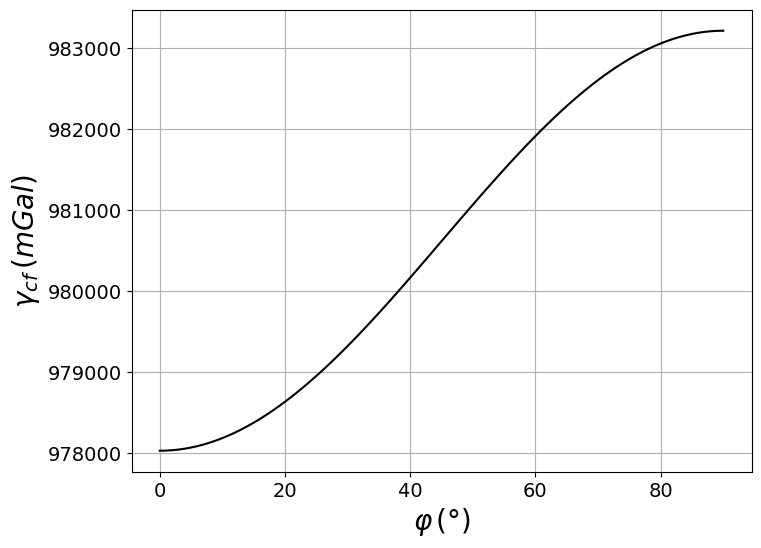

In [6]:
plt.close('all')
plt.figure(figsize=(8,6))
plt.xlabel('$\\varphi \, (\degree)$', fontsize = 20)
plt.ylabel('$\gamma_{cf} \, (mGal)$', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(phi,gammacf,'k-')
plt.grid()
plt.show()

Observe que a gravidade normal predita pela expressão analítica ($\gamma_{cf}$) é similar ao que foi gerado pela fórmula de Somigliana ($\gamma_{s}$).

## Comparação entre $\gamma_{s}$ e $\gamma_{cf}$ sobre o elipsoide

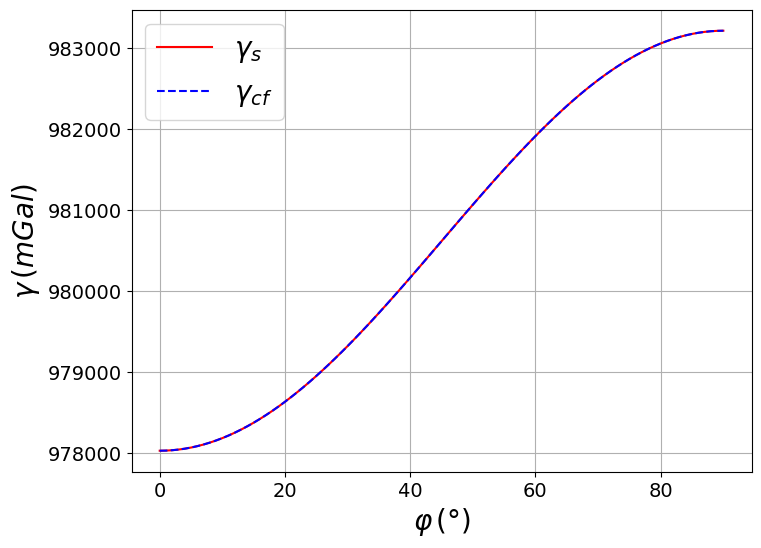

In [7]:
plt.close('all')
plt.figure(figsize=(8,6))
plt.plot(phi,gammas,'r-', label='$\gamma_{s}$')
plt.plot(phi,gammacf,'b--', label='$\gamma_{cf}$')
plt.xlabel('$\\varphi \, (\degree)$', fontsize = 20)
plt.ylabel('$\gamma \, (mGal)$', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(loc='best', fontsize=20)
plt.show()

Observe que, sobre o elipsoide, $\gamma_{s}$ e $\gamma_{cf}$ são praticamente iguais, como era de se esperar

## Análise do gradiente da gravidade normal ($\partial \gamma / \partial h$) na direção da normal ao elipsoide utilizando a expressão analítica

O gradiente $\partial \gamma / \partial h$ foi calculado para latitudes geodésicas $\varphi$ variando de $0^{\circ}$ a $90^{\circ}$ utilizando-se a fórmula analítica, de acordo com uma aproximação por diferenças finitas dada por:

### $\dfrac{\partial \gamma}{\partial h} \approx \dfrac{\gamma_{cf}(h_{0} + \Delta h, \varphi) - \gamma_{cf}(h_{0} - \Delta h, \varphi)}{2\,\Delta h}$ ,

em que $h_{0} = 0$ m, $\Delta h = 10$ m e o elipsoide de referência é o WGS84.

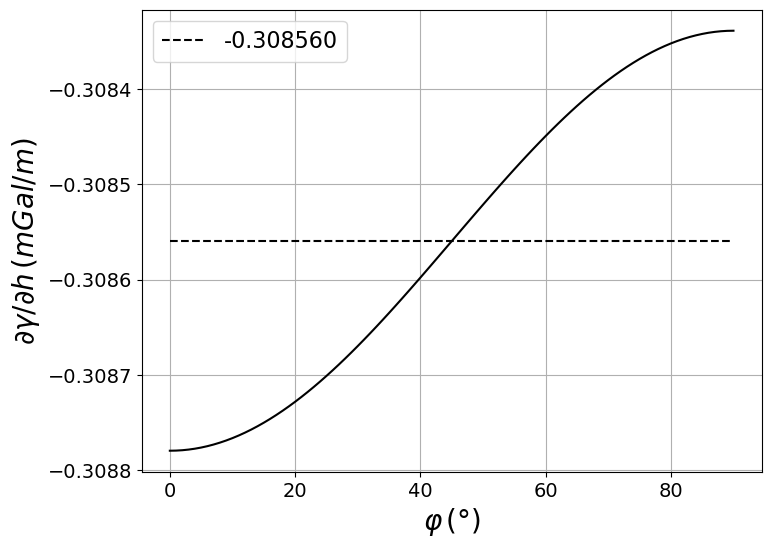

In [8]:
phi = np.linspace(0.0, 90.0, 91)
a, f, GM, omega = gamma.WGS84()
dh = 10.0
h = 0.0
h1 = h-dh
h2 = h+dh
gammacf1 = gamma.closedform(a, f, GM, omega, phi, h1)
gammacf2 = gamma.closedform(a, f, GM, omega, phi, h2)
dgamma = (gammacf2-gammacf1)/(2*dh)
dgamma_mean = np.mean(dgamma)

plt.close('all')
plt.figure(figsize=(8,6))
plt.plot(phi,dgamma,'k-')
lb = '%.6f' % dgamma_mean
plt.plot([phi[0], phi[-1]], [dgamma_mean, dgamma_mean], 'k--', label=lb)
plt.xlabel('$\\varphi \, (\degree)$', fontsize = 20)
plt.ylabel('$\partial \gamma / \partial h \, (mGal/m)$', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(loc='best', fontsize = 16)
plt.show()

Observe que o gradiente $\partial \gamma / \partial h$ é mínimo na latitude $\varphi = 0^{\circ}$ (equador) e máximo na latitude $\varphi = 90^{\circ}$ (pólo). No entanto, esta variação é muito pequena, indo de $-0.3088$ (mGal/m) até $-0.3083$ (mGal/m). O valor médio de $\partial \gamma / \partial h$ é $-0.3086$ (mGal/m).

### Exercícios

1. Determine as componentes da aceleração centrífuga no sistema geocêntrico de coordenadas Cartesianas;
2. Determine as componentes da aceleração centrífuga no sistema geocêntrico de coordenadas geodésicas;
3. Determine a magnitude da aceleração centrífuga em função da latitude;
4. Faça um gráfico de $100 \times \dfrac{a_{c}}{\gamma}$ em função da latitude geodésica $\varphi$, sobre a superfície do elipsoide, em que $a_{c}$ é a magnitude da aceleração centrífuga e $\gamma$ é a gravidade normal.